# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [4]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [5]:
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03
1,Total,"Jan 01, 1979",1979/01/01,NaN,NaN,29.03
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35
3,Total,"Jan 02, 1979",1979/01/02,NaN,NaN,31.35
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66
...,...,...,...,...,...,...
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61
24103,Total,"Dec 30, 2011",2011/12/30,NaN,NaN,68.61
24104,NaN,"Dec 31, 2011",2011/12/31,Texas,48.0,73.49
24105,Total,"Dec 31, 2011",2011/12/31,NaN,NaN,73.49


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [6]:
df = df[~df['Notes'].astype(str).str.contains("Total")]
df

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89
...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61


>3) Make a column called Date that is in the pandas datetime format

In [7]:
df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')
df

/tmp/ipykernel_19956/71855442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Month Day, Year'],errors='raise')


,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05
...,...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67,2011-12-27
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91,2011-12-28
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64,2011-12-29
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [8]:
df['Year']=df["Month Day, Year Code"].apply(lambda x: x.split('/')[0])
df['Month']=df["Month Day, Year Code"].apply(lambda x: x.split('/')[1])
df['Day']=df["Month Day, Year Code"].apply(lambda x: x.split('/')[2])
df

/tmp/ipykernel_19956/286518013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df["Month Day, Year Code"].apply(lambda x: x.split('/')[0])
/tmp/ipykernel_19956/286518013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df["Month Day, Year Code"].apply(lambda x: x.split('/')[1])
/tmp/ipykernel_19956/286518013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01,1979,01,01
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02,1979,01,02
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03,1979,01,03
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04,1979,01,04
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05,1979,01,05
...,...,...,...,...,...,...,...,...,...,...
24096,NaN,"Dec 27, 2011",2011/12/27,Texas,48.0,56.67,2011-12-27,2011,12,27
24098,NaN,"Dec 28, 2011",2011/12/28,Texas,48.0,59.91,2011-12-28,2011,12,28
24100,NaN,"Dec 29, 2011",2011/12/29,Texas,48.0,66.64,2011-12-29,2011,12,29
24102,NaN,"Dec 30, 2011",2011/12/30,Texas,48.0,68.61,2011-12-30,2011,12,30


In [9]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/tmp/ipykernel_19956/1970195628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

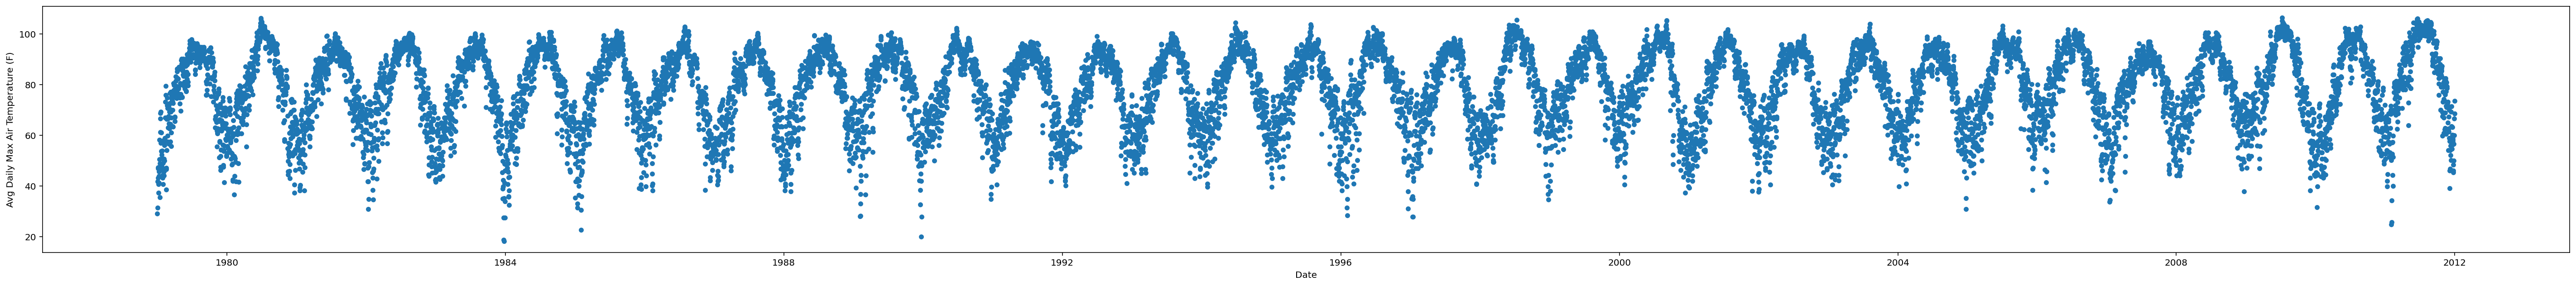

In [10]:
p1=df[['Date', 'Avg Daily Max Air Temperature (F)']]
p1.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

The temperature changes throught diffent seasons, but we are able to use the previous years weather during a the season to predict what it will be like now. The temperature goes up in the summer and down in the winter every year.

### Adding colors for our graph

In [11]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/tmp/ipykernel_19956/2382980842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

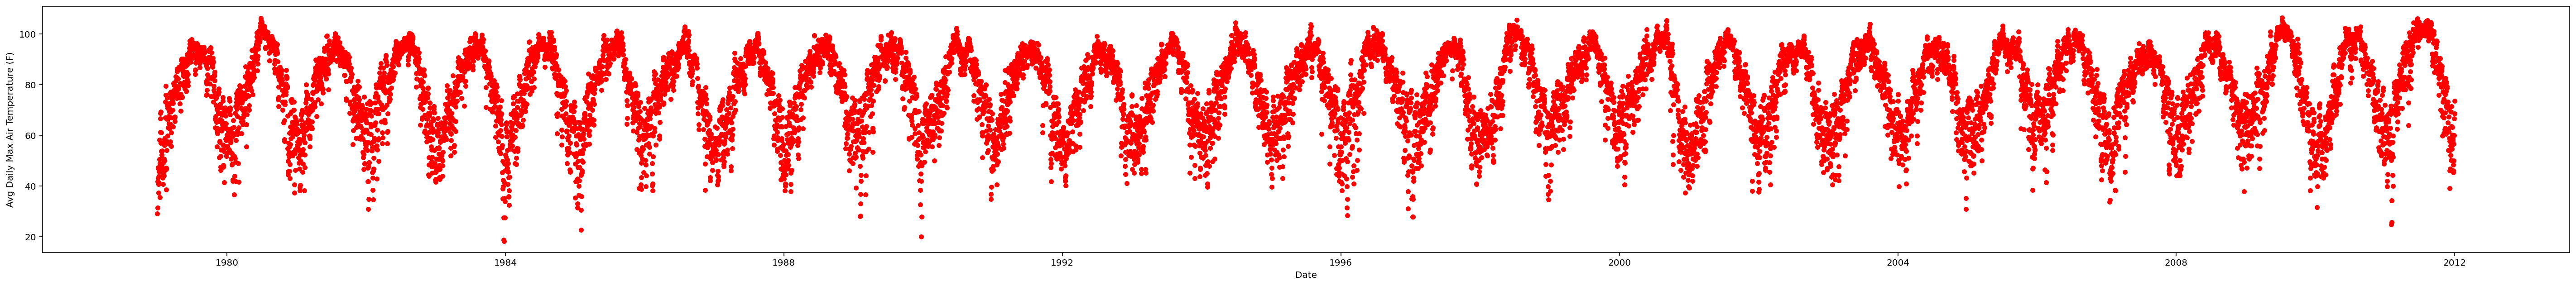

In [12]:
p1=df[['Date', 'Avg Daily Max Air Temperature (F)']]
p1.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)',figsize=(50,5), color='red')

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [13]:
subset=df[df["Date"]<pd.datetime(1979,6,1)]
subset

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01,1979,01,01,2839968.0,#000000
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02,1979,01,02,2840832.0,#000000
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03,1979,01,03,2841696.0,#000000
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04,1979,01,04,2842560.0,#000000
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...
292,NaN,"May 27, 1979",1979/05/27,Texas,48.0,87.63,1979-05-27,1979,05,27,2966112.0,#00aaa1
294,NaN,"May 28, 1979",1979/05/28,Texas,48.0,88.70,1979-05-28,1979,05,28,2966976.0,#00aaa1
296,NaN,"May 29, 1979",1979/05/29,Texas,48.0,89.72,1979-05-29,1979,05,29,2967840.0,#00aaa1
298,NaN,"May 30, 1979",1979/05/30,Texas,48.0,88.80,1979-05-30,1979,05,30,2968704.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

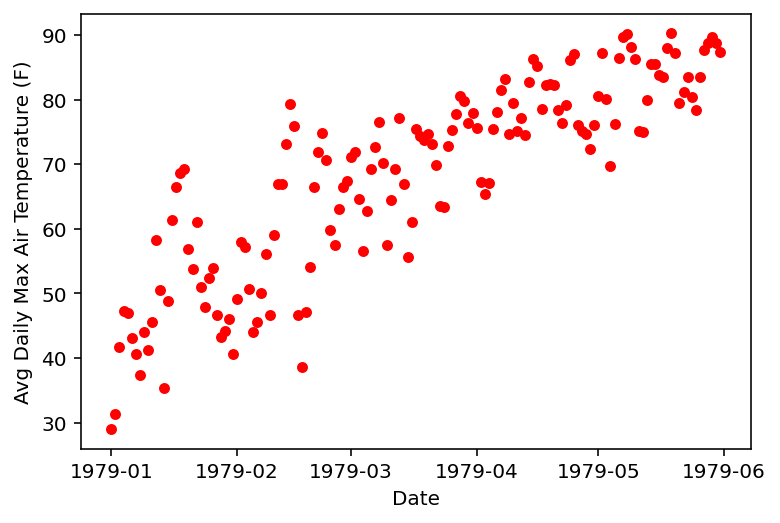

In [14]:
p2=subset[['Date', 'Avg Daily Max Air Temperature (F)']]
p2.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)', color='red')

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [15]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [16]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [17]:
Y_pred = lin_reg(X,Y)

0.00034443088958599586 -932.4267269431856


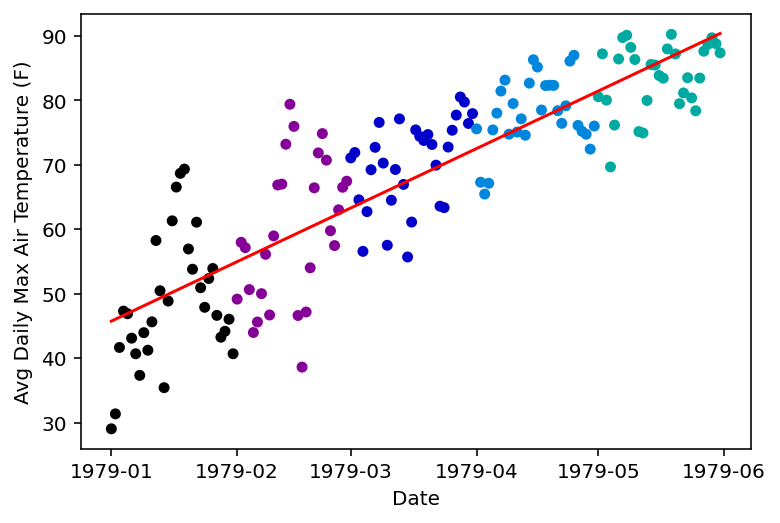

In [18]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

0.00034443088958599586 -932.4267269431856

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [19]:
min(Y_pred)

45.745977692575934

In [20]:
max(Y_pred)

90.38422098292097

Positive

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [26]:
subset=df[df["Date"]<pd.datetime(2011,6,1)]
subset

,Notes,"Month Day, Year","Month Day, Year Code",State,State Code,Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,Texas,48.0,29.03,1979-01-01,1979,01,01,2839968.0,#000000
2,NaN,"Jan 02, 1979",1979/01/02,Texas,48.0,31.35,1979-01-02,1979,01,02,2840832.0,#000000
4,NaN,"Jan 03, 1979",1979/01/03,Texas,48.0,41.66,1979-01-03,1979,01,03,2841696.0,#000000
6,NaN,"Jan 04, 1979",1979/01/04,Texas,48.0,47.30,1979-01-04,1979,01,04,2842560.0,#000000
8,NaN,"Jan 05, 1979",1979/01/05,Texas,48.0,46.89,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...
23668,NaN,"May 27, 2011",2011/05/27,Texas,48.0,101.92,2011-05-27,2011,05,27,13064544.0,#00aaa1
23670,NaN,"May 28, 2011",2011/05/28,Texas,48.0,104.46,2011-05-28,2011,05,28,13065408.0,#00aaa1
23672,NaN,"May 29, 2011",2011/05/29,Texas,48.0,101.84,2011-05-29,2011,05,29,13066272.0,#00aaa1
23674,NaN,"May 30, 2011",2011/05/30,Texas,48.0,99.73,2011-05-30,2011,05,30,13067136.0,#00aaa1


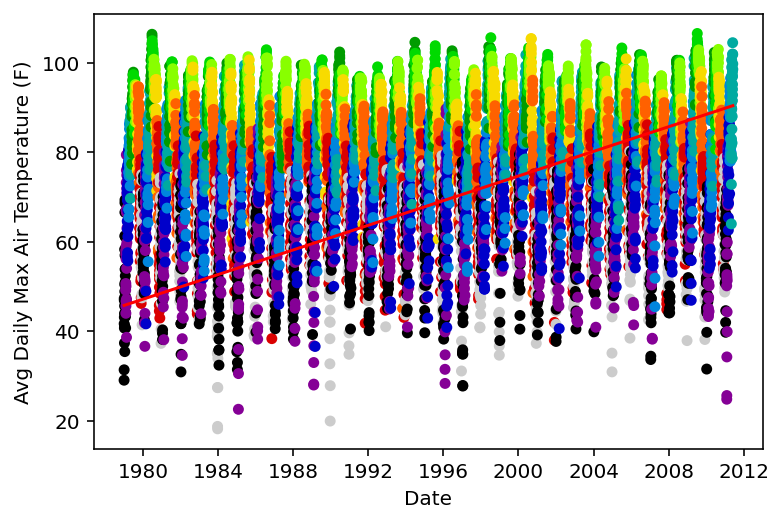

In [27]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

Positive, because the weather changed throughout the year, and also because of global warming.